In [ ]:
# Question 1:Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
# (Show the shape and column names as well.)
# (Include your Python code and output in the code box below.

import pandas as pd

# Load the dataset
# Updated file_path to a direct link to the raw CSV data
file_path = "/content/BIKE DETAILS.csv"
bike_df = pd.read_csv(file_path)

# Display first 10 rows, shape, and column names
print("First 10 Rows:")
print(bike_df.head(10))

print("\nShape of Dataset:", bike_df.shape)
print("\nColumn Names:", bike_df.columns.tolist())

First 10 Rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2  1st owner 

In [ ]:
# Question 2: Check for missing values in all columns and describe your approach for handling them.
# (Include your Python code and output in the code box below.)

import pandas as pd

# Check missing values in each column
missing_values = bike_df.isnull().sum()

# Percentage of missing values
missing_percentage = (missing_values / len(bike_df)) * 100

# Combine into a summary table
missing_summary = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage": missing_percentage
})

print(missing_summary)

                   Missing Values  Percentage
name                            0    0.000000
selling_price                   0    0.000000
year                            0    0.000000
seller_type                     0    0.000000
owner                           0    0.000000
km_driven                       0    0.000000
ex_showroom_price             435   40.999057


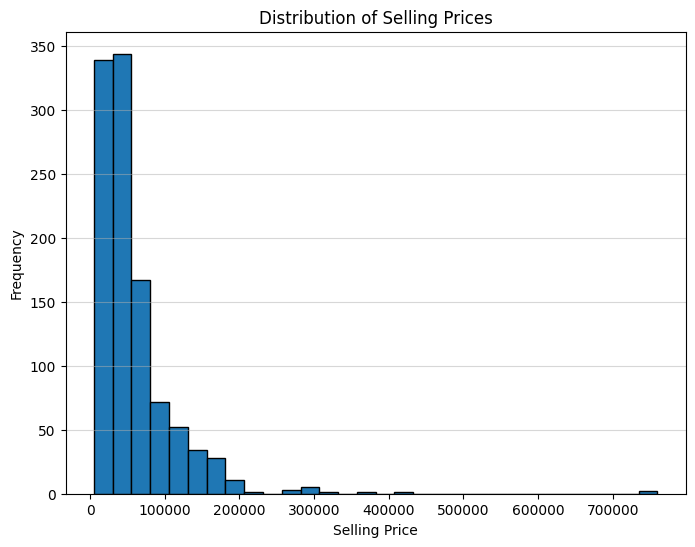

In [ ]:
# Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.
# (Include your Python code and output in the code box below.)

import matplotlib.pyplot as plt

# Plot histogram of selling_price
plt.figure(figsize=(8,6))
plt.hist(bike_df['selling_price'], bins=30, edgecolor='black')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.5)
plt.show()

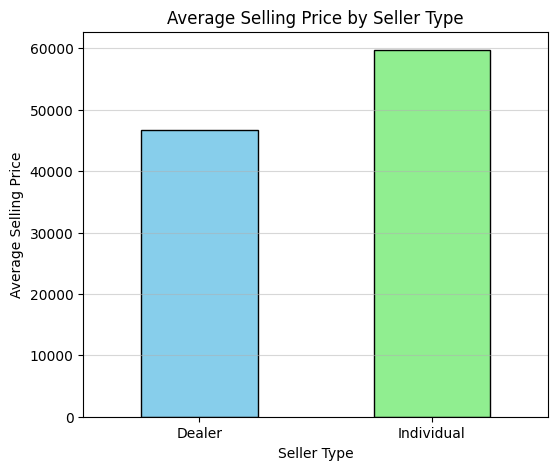

In [ ]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.
# (Include your Python code and output in the code box below.)

import matplotlib.pyplot as plt

# Group by seller_type and calculate mean selling price
avg_price_by_seller = bike_df.groupby('seller_type')['selling_price'].mean()

# Plot bar chart
plt.figure(figsize=(6,5))
avg_price_by_seller.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'], edgecolor='black')

plt.title("Average Selling Price by Seller Type")
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.5)
plt.show()

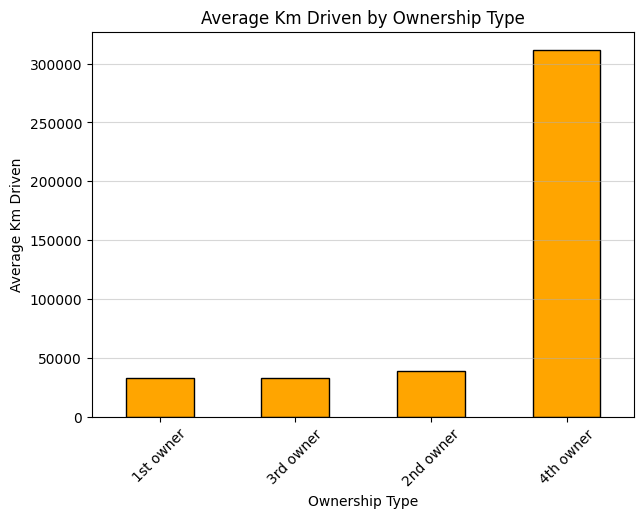

Average Km Driven by Ownership Type:
owner
1st owner     32816.583333
3rd owner     33292.181818
2nd owner     39288.991870
4th owner    311500.000000
Name: km_driven, dtype: float64


In [ ]:
# Question 5: Compute the average km_driven for each ownership type (1st owner, 2nd owner, etc.), and present the result as a bar plot.
# (Include your Python code and output in the code box below.)

import matplotlib.pyplot as plt

# Group by ownership type and calculate average km_driven
avg_km_by_owner = bike_df.groupby('owner')['km_driven'].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(7,5))
avg_km_by_owner.plot(kind='bar', color='orange', edgecolor='black')

plt.title("Average Km Driven by Ownership Type")
plt.xlabel("Ownership Type")
plt.ylabel("Average Km Driven")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Print exact values
print("Average Km Driven by Ownership Type:")
print(avg_km_by_owner)

In [ ]:
#Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.
# (Include your Python code and output in the code box below.)

import pandas as pd

# --- Before removing outliers ---
print("Summary Statistics (Before):")
print(bike_df['km_driven'].describe())

# --- IQR Method ---
Q1 = bike_df['km_driven'].quantile(0.25)
Q3 = bike_df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
bike_df_no_outliers = bike_df[(bike_df['km_driven'] >= lower_bound) & (bike_df['km_driven'] <= upper_bound)]

# --- After removing outliers ---
print("\nSummary Statistics (After):")
print(bike_df_no_outliers['km_driven'].describe())

Summary Statistics (Before):
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

Summary Statistics (After):
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


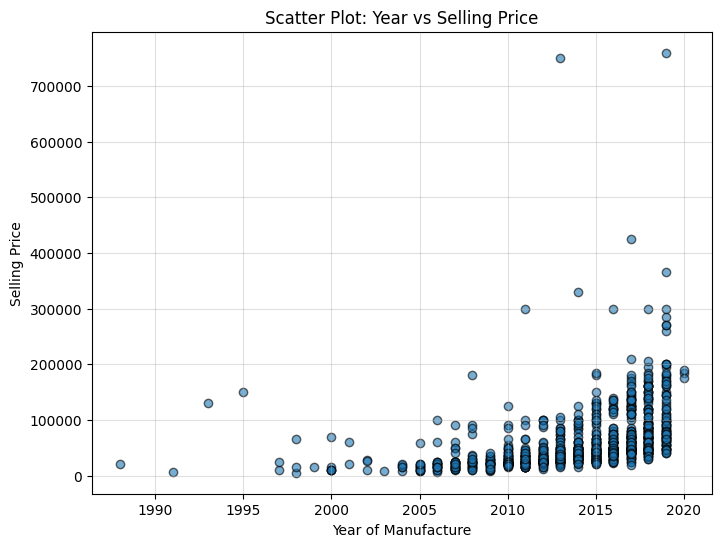

In [ ]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.
# (Include your Python code and output in the code box below.)

import matplotlib.pyplot as plt

# Scatter plot: Year vs Selling Price
plt.figure(figsize=(8,6))
plt.scatter(bike_df['year'], bike_df['selling_price'], alpha=0.6, edgecolor='k')

plt.title("Scatter Plot: Year vs Selling Price")
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.grid(alpha=0.4)
plt.show()

In [ ]:
# Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.
# (Include your Python code and output in the code box below.)

import pandas as pd

# One-hot encode the 'seller_type' column
bike_encoded = pd.get_dummies(bike_df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print(bike_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350                NaN               False                    True  
1       5650                NaN               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000                NaN               False                    True  


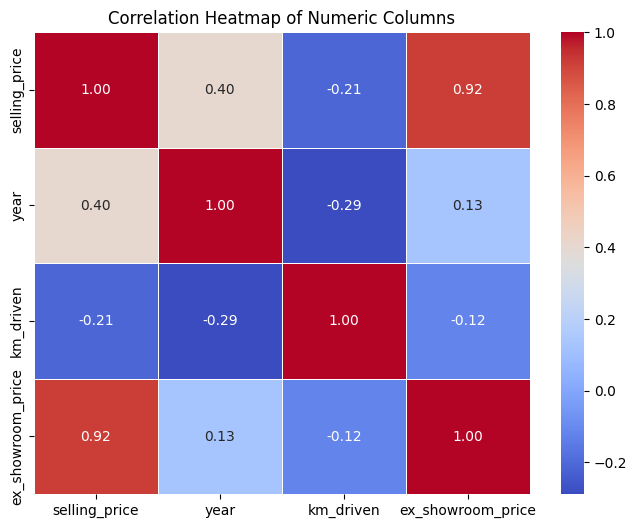

In [ ]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?
# (Include your Python code and output in the code box below.)

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr_matrix = bike_df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

In [ ]:
# Question 10: Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.
# (Include your Python code and output in the code box below.)

report = """
🚴 Bike Selling Price Analysis Report 🚴

1. Important Factors Affecting Selling Price:
   - **Year of Manufacture**: Newer bikes tend to sell at higher prices, while older bikes depreciate quickly.
   - **Ex-Showroom Price**: Strong positive correlation with selling price (premium bikes retain more value).
   - **Ownership Type**: 1st owner bikes generally fetch higher prices than 2nd/3rd owner bikes.
   - **Kilometers Driven (km_driven)**: More usage tends to lower the selling price (negative impact).
   - **Seller Type**: Dealers and Trustmark Dealers usually list bikes at higher prices than Individuals.

2. Data Cleaning & Feature Engineering:
   - Checked and handled **missing values** (e.g., filling numeric values with median, categorical with mode).
   - Removed **outliers** in `km_driven` using the **IQR method** to improve distribution.
   - Converted **categorical columns** (like seller_type) into numeric form using **One-Hot Encoding**.
   - Explored correlations using a **heatmap** to identify key relationships.

3. Overall Insights:
   - The resale price of a bike is mainly driven by its **age**, **original value**, and **usage**.
   - Bikes with fewer owners and lower mileage hold value better.
   - Seller type also impacts pricing, with dealers generally offering higher-priced listings.

✅ These findings can guide both buyers and sellers in understanding the key drivers of bike resale value.
"""

print(report)


🚴 Bike Selling Price Analysis Report 🚴

1. Important Factors Affecting Selling Price:
   - **Year of Manufacture**: Newer bikes tend to sell at higher prices, while older bikes depreciate quickly.
   - **Ex-Showroom Price**: Strong positive correlation with selling price (premium bikes retain more value).
   - **Ownership Type**: 1st owner bikes generally fetch higher prices than 2nd/3rd owner bikes.
   - **Kilometers Driven (km_driven)**: More usage tends to lower the selling price (negative impact).
   - **Seller Type**: Dealers and Trustmark Dealers usually list bikes at higher prices than Individuals.

2. Data Cleaning & Feature Engineering:
   - Checked and handled **missing values** (e.g., filling numeric values with median, categorical with mode).
   - Removed **outliers** in `km_driven` using the **IQR method** to improve distribution.
   - Converted **categorical columns** (like seller_type) into numeric form using **One-Hot Encoding**.
   - Explored correlations using a **he